<a href="https://colab.research.google.com/github/GhanshamSoomarani/Data-Science-Analytics/blob/main/20sw081_(lab_13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/content/sample_data/hour.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
df.isna().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Renaming columns names to more readable names
df.rename(columns={'instant':'record_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [6]:
df.columns.values

array(['record_id', 'datetime', 'season', 'year', 'month', 'hour',
       'is_holiday', 'weekday', 'is_workingday', 'weather_condition',
       'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'total_count'], dtype=object)

In [ ]:
#the registered and casual columns are added up to the total count therefore we can drop those columns.
df.drop(['record_id','casual', 'registered'], axis=1, inplace=True)

In [7]:
# date time conversion
df['datetime'] = pd.to_datetime(df.datetime)

# categorical variables
df['season'] = df.season.astype('category')
df['is_holiday'] = df.is_holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weather_condition'] = df.weather_condition.astype('category')
df['is_workingday'] = df.is_workingday.astype('category')
df['month'] = df.month.astype('category')
df['year'] = df.year.astype('category')
df['hour'] = df.hour.astype('category')

Text(0, 0.5, 'total_count')

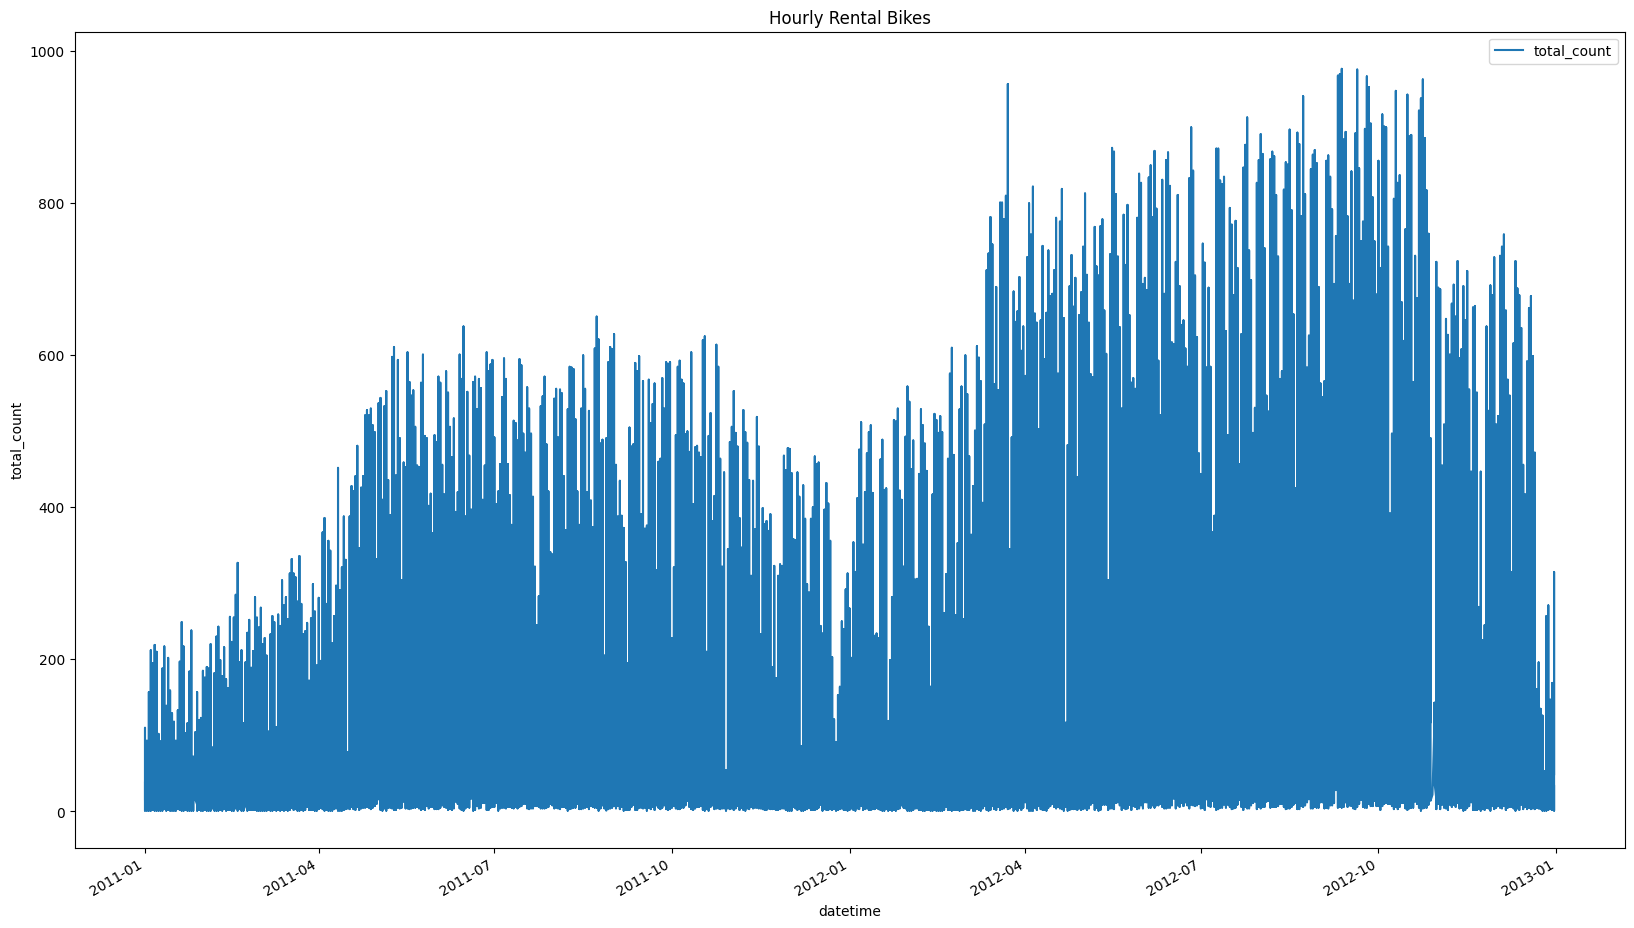

In [8]:
df.plot(x='datetime', y='total_count', figsize=(20,12), title = 'Hourly Rental Bikes')
plt.ylabel('total_count')

<Axes: ylabel='Frequency'>

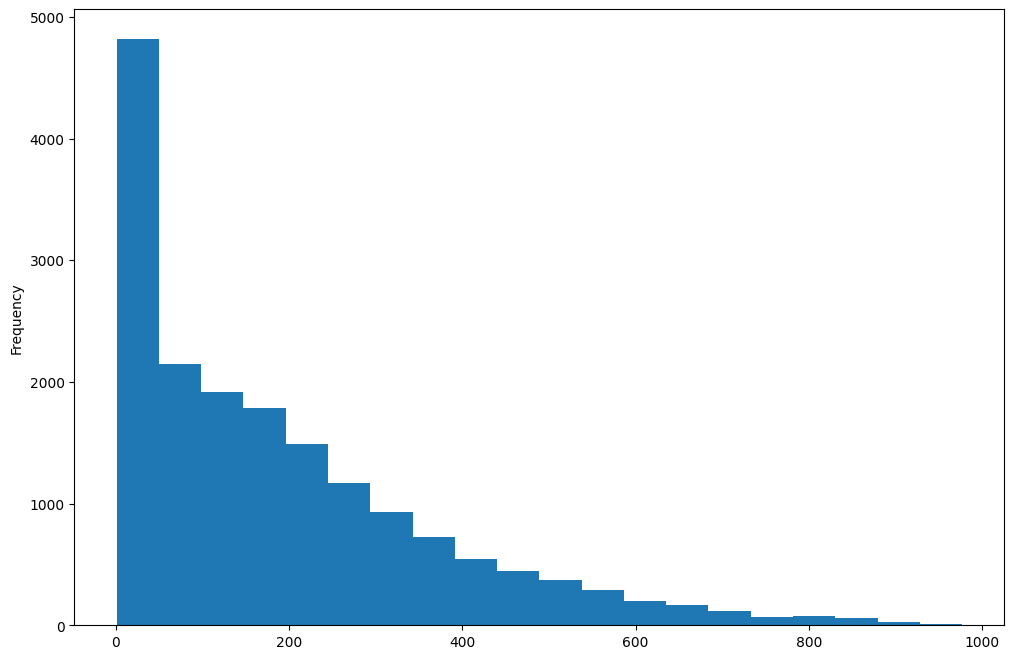

In [9]:
df['total_count'].plot.hist(bins=20, figsize=(12,8))

In [10]:
# get the correlation

df.corr()

<ipython-input-10-e10562a57f0e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,record_id,temp,atemp,humidity,windspeed,casual,registered,total_count
record_id,1.000000,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
temp,0.136178,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
humidity,0.009577,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.282046,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
total_count,0.278379,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


<ipython-input-11-9de2d3d443a1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")


<Axes: >

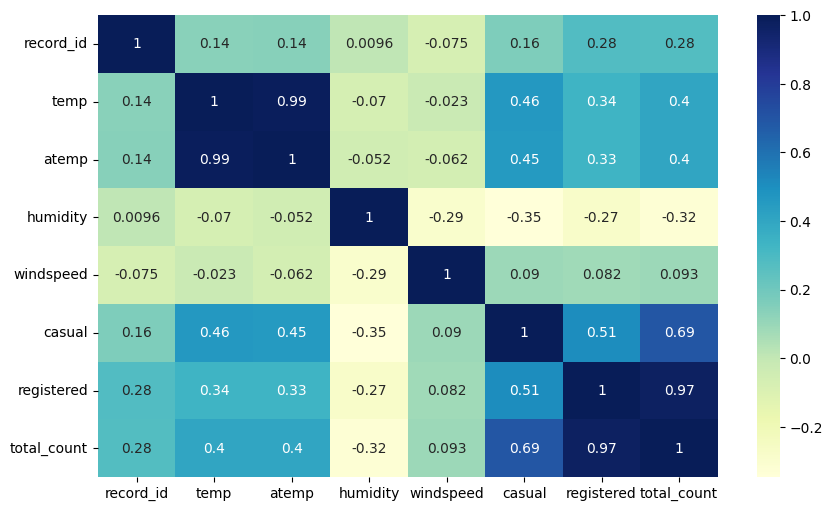

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


In [13]:
cat_attr_list = ['season','is_holiday',
                 'weather_condition','is_workingday',
                 'hour','weekday','month','year']
for col in cat_attr_list:
  df[col] = le.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   record_id          17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  int64         
 3   year               17379 non-null  int64         
 4   month              17379 non-null  int64         
 5   hour               17379 non-null  int64         
 6   is_holiday         17379 non-null  int64         
 7   weekday            17379 non-null  int64         
 8   is_workingday      17379 non-null  int64         
 9   weather_condition  17379 non-null  int64         
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

In [14]:
df.drop(['temp'], axis=1, inplace=True)

In [15]:
df.drop('datetime', axis=1, inplace=True)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
X = df.drop(['total_count'],axis=1)
y = df['total_count']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=5)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12165, 14), (5214, 14), (12165,), (5214,))

In [20]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [21]:
predictions = regressor.predict(X_test)
predictions.shape

(5214,)

In [22]:
import math
import sklearn.metrics
mse = sklearn.metrics.mean_squared_error(y_test, predictions)

rmse = math.sqrt(mse)
rmse

2.5503974164432205e-11

In [23]:
from sklearn.ensemble import RandomForestRegressor

random_regressor = RandomForestRegressor().fit(X_train, y_train)
print(math.sqrt(mean_squared_error(y_test, random_regressor.predict(X_test))))

3.189794157370999


In [24]:
feat_importances = pd.DataFrame(random_regressor.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances

,Importance
registered,0.948433
casual,0.051258
humidity,0.000060
record_id,0.000051
atemp,0.000045
hour,0.000044
windspeed,0.000040
weekday,0.000023
month,0.000020
season,0.000010


<Axes: >

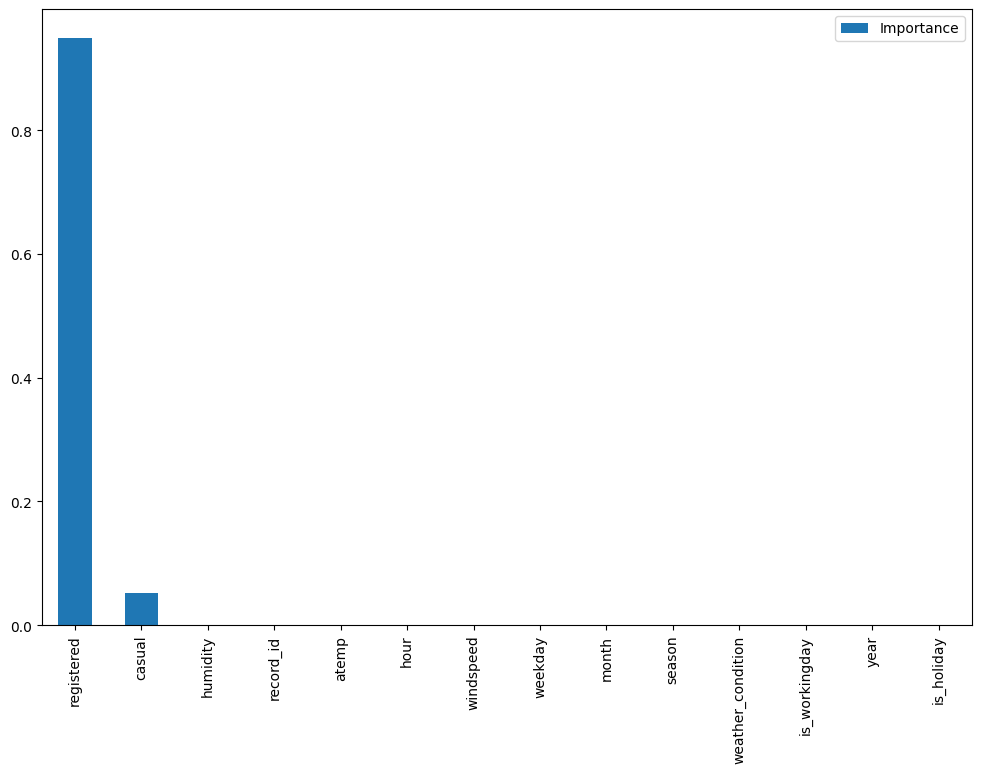

In [25]:
feat_importances.plot(kind='bar', figsize=(12,8))

# ML Pipeline


In [28]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv("/content/sample_data/hour.csv")

In [30]:
# Renaming columns names to more readable names
df.rename(columns={'instant':'record_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

In [31]:
df.drop(['record_id','casual', 'registered','datetime','temp'], axis=1, inplace=True)

In [32]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [33]:
X = df.drop(['total_count'],axis=1)
y = df['total_count']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [35]:
pipeline = Pipeline(steps = [
            ('regressor',RandomForestRegressor())
           ])

In [36]:
model = pipeline.fit(X_train, y_train)
print (model)

Pipeline(steps=[('regressor', RandomForestRegressor())])


In [37]:
predictions = model.predict(X_test)

In [38]:
print(math.sqrt(mean_squared_error(y_test, predictions)))

42.12179248278245
